# Data Join


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
df_1 = pd.read_csv('../data/text_emotion.csv')

In [3]:
# Check the data
df_1.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
df_clean_1 = df_1
df_clean_1.drop(['author', 'tweet_id'], axis=1, inplace=True)

df_clean_1.rename(columns={'content': 'text'}, inplace=True)
df_clean_1.rename(columns={'sentiment': 'label'}, inplace=True)

In [5]:
# Check the data
print(df_clean_1.head())
print(df_clean_1.shape)

        label                                               text
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...
(40000, 2)


In [29]:
#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
df_clean_1['label'] = df_clean_1['label'].replace(['sadness', 'empty'], 0)
df_clean_1['label'] = df_clean_1['label'].replace(['joy', 'happiness', 'fun', 'enthusiasm', 'relief'], 1)
df_clean_1['label'] = df_clean_1['label'].replace(['love'], 2)
df_clean_1['label'] = df_clean_1['label'].replace(['anger', 'hate'], 3)
df_clean_1['label'] = df_clean_1['label'].replace(['fear', 'worry'], 4)
df_clean_1['label'] = df_clean_1['label'].replace(['surprise'], 5)
df_clean_1['label'] = df_clean_1['label'].replace(['neutral', 'boredom'], 6)

In [30]:
# Check the data
print(df_clean_1.head())

   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


In [31]:
# read the values from column 'label' into a list
label_list = df_clean_1['label'].tolist()
print(label_list)

[0, 0, 0, 1, 6, 4, 0, 4, 0, 0, 6, 4, 0, 0, 5, 0, 2, 0, 4, 0, 4, 1, 6, 4, 0, 4, 0, 4, 0, 4, 3, 6, 6, 6, 6, 6, 0, 4, 6, 6, 1, 1, 4, 4, 0, 4, 4, 0, 6, 6, 6, 4, 0, 6, 6, 4, 1, 6, 6, 0, 4, 0, 0, 0, 0, 6, 4, 0, 4, 1, 6, 4, 6, 6, 4, 6, 6, 1, 4, 4, 0, 6, 0, 4, 0, 4, 3, 4, 4, 4, 6, 6, 4, 6, 2, 0, 0, 0, 6, 3, 4, 3, 6, 0, 4, 3, 0, 3, 4, 0, 4, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 3, 2, 4, 3, 0, 1, 0, 6, 4, 6, 2, 0, 6, 6, 0, 0, 6, 6, 4, 6, 0, 6, 4, 6, 4, 6, 1, 1, 6, 0, 2, 4, 4, 4, 4, 6, 4, 4, 4, 3, 4, 0, 0, 5, 1, 0, 4, 0, 6, 4, 0, 4, 0, 0, 6, 6, 4, 6, 1, 0, 6, 1, 0, 4, 0, 0, 4, 4, 5, 5, 0, 5, 0, 5, 4, 3, 4, 1, 4, 0, 4, 0, 0, 0, 6, 3, 6, 6, 3, 2, 0, 3, 0, 0, 1, 3, 6, 6, 3, 6, 6, 4, 5, 6, 4, 0, 4, 0, 4, 4, 6, 6, 1, 1, 6, 0, 4, 0, 4, 6, 6, 0, 4, 0, 0, 1, 4, 6, 4, 1, 6, 4, 6, 0, 5, 3, 6, 4, 5, 5, 4, 3, 3, 6, 6, 4, 0, 0, 0, 0, 6, 0, 5, 4, 0, 0, 5, 4, 6, 4, 0, 6, 3, 6, 4, 1, 6, 6, 5, 6, 0, 4, 1, 4, 6, 4, 0, 6, 3, 4, 0, 3, 6, 0, 6, 6, 6, 1, 3, 6, 6, 1, 0, 0, 3, 6, 4, 4, 4, 4, 0, 6, 0, 0, 4, 0, 0, 0, 4, 6, 0, 0, 

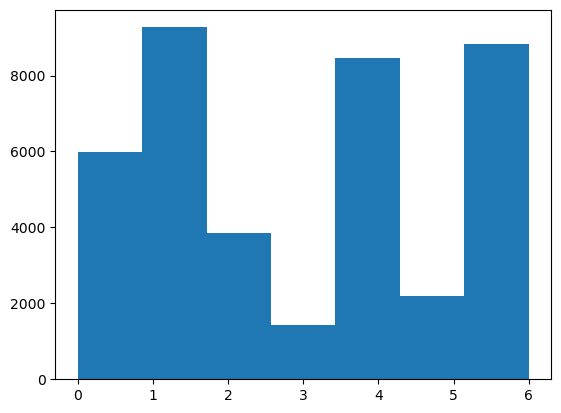

In [36]:
# put the list into a graph
plt.hist(label_list, bins=7)
plt.show()

In [41]:
#drop na
df_clean_1.dropna(inplace=True)
print(df_clean_1.shape)
print(df_clean_1.head())

(40000, 2)
   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


In [34]:
# Read in the data
df_2 = pd.read_csv('../data/training.csv')

In [35]:
# Check the data
df_2.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [43]:
#drop na
df_clean_2 = df_2
df_clean_2.dropna(inplace=True)
print(df_clean_2.shape)
print(df_clean_2.head())

(16000, 2)
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [44]:
# join datasets
df_clean = pd.concat([df_clean_1, df_clean_2], ignore_index=True)
print(df_clean.shape)

(56000, 2)


In [45]:
# Check the data

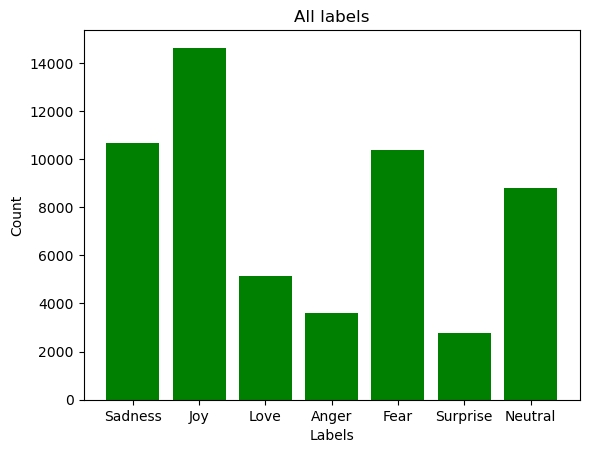

In [52]:
label_list_clean = df_clean['label'].tolist()

#sadness = 0, joy = 1, love = 2, anger = 3, fear = 4, surprise = 5, neutral = 6
fig, ax = plt.subplots()
sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral']
counts = [label_list_clean.count(0), label_list_clean.count(1), label_list_clean.count(2), label_list_clean.count(3), label_list_clean.count(4), label_list_clean.count(5), label_list_clean.count(6)]

ax.bar(sentiments, counts, color='green')
ax.set_title('All labels')
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
plt.show()

In [57]:
from pathlib import Path
filepath = Path('../data/cleaned/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_clean.to_csv(filepath, index=False)

In [58]:
# Read in the data
df_clean_imp = pd.read_csv('../data/cleaned/out.csv')
df_clean_imp.head()
df_clean_imp.shape

(56000, 2)